## Question 1

Missing values:
age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Most frequent observation (mode) for 'education': secondary


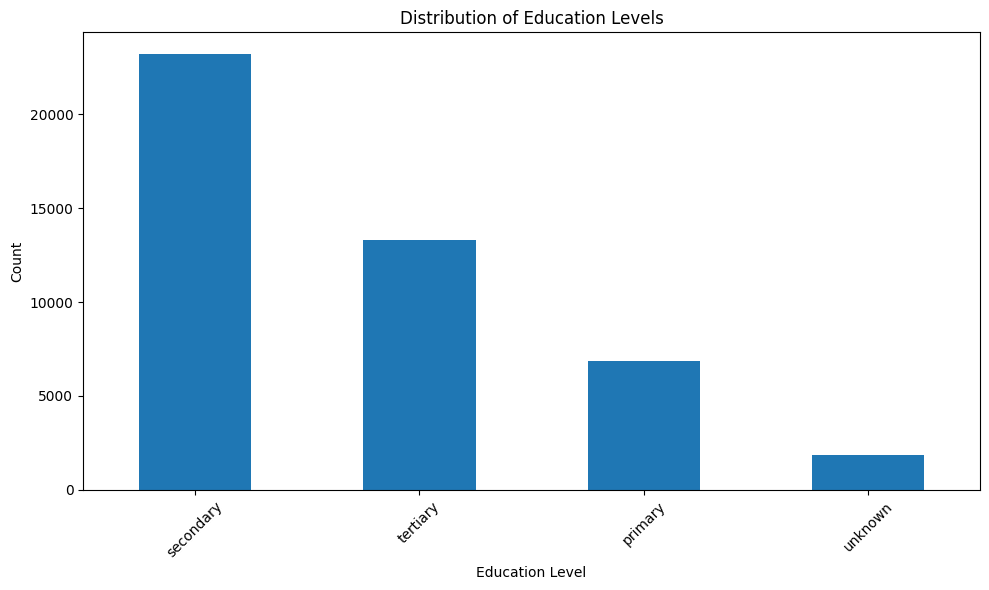

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the file path
file_path = os.path.join('bank+marketing', 'bank', 'bank-full.csv')

# Load the data
df = pd.read_csv(file_path, sep=';')

# Select only the specified features
selected_features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[selected_features]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Question 1: Most frequent observation (mode) for the column 'education'
education_mode = df['education'].mode().values[0]
print(f"\nMost frequent observation (mode) for 'education': {education_mode}")

# Visualize the distribution of education levels
plt.figure(figsize=(10, 6))
df['education'].value_counts().plot(kind='bar')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Question 2

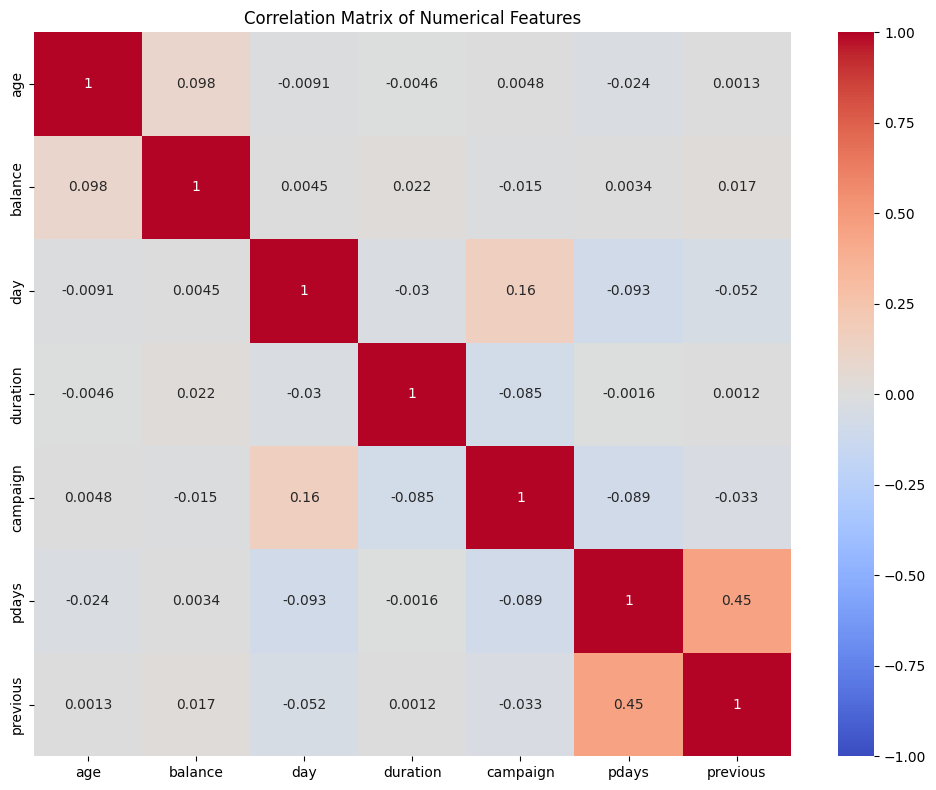

The two features with the highest correlation are: pdays and previous
Their correlation coefficient is: 0.4548


In [16]:
import seaborn as sns
import numpy as np

# Set the file path
file_path = os.path.join('bank+marketing', 'bank', 'bank-full.csv')

# Load the data
df = pd.read_csv(file_path, sep=';')

# Select only the specified features
selected_features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[selected_features]

# Select numerical features
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
numeric_df = df[numeric_features]

# Create correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Find the two features with the highest absolute correlation
corr_matrix_abs = np.abs(corr_matrix)
np.fill_diagonal(corr_matrix_abs.values, 0)  # Exclude self-correlations
max_corr = corr_matrix_abs.max().max()
max_corr_features = np.where(corr_matrix_abs == max_corr)
feature1 = numeric_features[max_corr_features[0][0]]
feature2 = numeric_features[max_corr_features[1][0]]

print(f"The two features with the highest correlation are: {feature1} and {feature2}")
print(f"Their correlation coefficient is: {corr_matrix.loc[feature1, feature2]:.4f}")

## Question 3

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Set the file path
file_path = os.path.join('bank+marketing', 'bank', 'bank-full.csv')

# Load the data
df = pd.read_csv(file_path, sep=';')

# Select only the specified features
selected_features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[selected_features]

# Target encoding
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("Data split sizes:")
print(f"Train set: {len(X_train)} ({len(X_train)/len(X):.2%})")
print(f"Validation set: {len(X_val)} ({len(X_val)/len(X):.2%})")
print(f"Test set: {len(X_test)} ({len(X_test)/len(X):.2%})")

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Encode categorical variables
le = LabelEncoder()
X_train_encoded = X_train.copy()
for col in categorical_cols:
    X_train_encoded[col] = le.fit_transform(X_train[col])

# Calculate mutual information scores
mi_scores = mutual_info_classif(X_train_encoded[categorical_cols], y_train, random_state=42)

# Create a dictionary of feature names and their MI scores
mi_scores_dict = dict(zip(categorical_cols, mi_scores))

# Sort the dictionary by MI score in descending order
sorted_mi_scores = sorted(mi_scores_dict.items(), key=lambda x: x[1], reverse=True)

print("\nMutual Information Scores for Categorical Variables (rounded to 2 decimals):")
for feature, score in sorted_mi_scores:
    print(f"{feature}: {round(score, 2)}")

Data split sizes:
Train set: 27126 (60.00%)
Validation set: 9042 (20.00%)
Test set: 9043 (20.00%)

Mutual Information Scores for Categorical Variables (rounded to 2 decimals):
poutcome: 0.04
month: 0.03
contact: 0.01
housing: 0.01
job: 0.01
education: 0.0
marital: 0.0


## Question 4

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn

# Set the file path
file_path = os.path.join('bank+marketing', 'bank', 'bank-full.csv')

# Load the data
df = pd.read_csv(file_path, sep=';')

# Select only the specified features
selected_features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[selected_features]

# Target encoding
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print("Data split sizes:")
print(f"Train set: {len(X_train)} ({len(X_train)/len(X):.2%})")
print(f"Validation set: {len(X_val)} ({len(X_val)/len(X):.2%})")
print(f"Test set: {len(X_test)} ({len(X_test)/len(X):.2%})")

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create OneHotEncoder with appropriate parameter based on sklearn version
if sklearn.__version__ >= '0.23':
    onehot = OneHotEncoder(drop='first', sparse_output=False)
else:
    onehot = OneHotEncoder(drop='first', sparse=False)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', onehot, categorical_cols)
    ])

# Create a pipeline with preprocessor and logistic regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42))
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions on validation set
y_val_pred = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)

print(f"\nAccuracy on validation set: {accuracy:.2f}")

Data split sizes:
Train set: 27126 (60.00%)
Validation set: 9042 (20.00%)
Test set: 9043 (20.00%)

Accuracy on validation set: 0.90


## Question 5

In [19]:
# Set the file path
file_path = os.path.join('bank+marketing', 'bank', 'bank-full.csv')

# Load the data
df = pd.read_csv(file_path, sep=';')

# Select only the specified features
selected_features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[selected_features]

# Target encoding
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Split the data into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create OneHotEncoder with appropriate parameter based on sklearn version
if sklearn.__version__ >= '0.23':
    onehot = OneHotEncoder(drop='first', sparse_output=False)
else:
    onehot = OneHotEncoder(drop='first', sparse=False)

def create_model(features):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', [col for col in numerical_cols if col in features]),
            ('cat', onehot, [col for col in categorical_cols if col in features])
        ])
    
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42))
    ])
    
    return model

# Train model with all features
all_features = list(X_train.columns)
model_all = create_model(all_features)
model_all.fit(X_train, y_train)
y_val_pred_all = model_all.predict(X_val)
accuracy_all = accuracy_score(y_val, y_val_pred_all)

print(f"Accuracy with all features: {accuracy_all:.4f}")

# Features to analyze
features_to_analyze = ['age', 'balance', 'marital', 'previous']

# Dictionary to store accuracy differences
accuracy_diff = {}

for feature in features_to_analyze:
    features_without = [f for f in all_features if f != feature]
    model_without = create_model(features_without)
    model_without.fit(X_train, y_train)
    y_val_pred_without = model_without.predict(X_val)
    accuracy_without = accuracy_score(y_val, y_val_pred_without)
    
    diff = accuracy_all - accuracy_without
    accuracy_diff[feature] = diff
    print(f"Accuracy without {feature}: {accuracy_without:.4f}, Difference: {diff:.4f}")

# Find the feature with the smallest absolute difference
least_useful_feature = min(accuracy_diff, key=lambda x: abs(accuracy_diff[x]))

print(f"\nThe least useful feature among {features_to_analyze} is: {least_useful_feature}")
print(f"Its accuracy difference is: {accuracy_diff[least_useful_feature]:.4f}")

Accuracy with all features: 0.8995
Accuracy without age: 0.8993, Difference: 0.0002
Accuracy without balance: 0.8993, Difference: 0.0002
Accuracy without marital: 0.8984, Difference: 0.0011
Accuracy without previous: 0.8989, Difference: 0.0006

The least useful feature among ['age', 'balance', 'marital', 'previous'] is: age
Its accuracy difference is: 0.0002


## Question 6

In [20]:
# Set the file path
file_path = os.path.join('bank+marketing', 'bank', 'bank-full.csv')

# Load the data
df = pd.read_csv(file_path, sep=';')

# Select only the specified features
selected_features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
df = df[selected_features]

# Target encoding
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Split the data into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create OneHotEncoder with appropriate parameter based on sklearn version
if sklearn.__version__ >= '0.23':
    onehot = OneHotEncoder(drop='first', sparse_output=False)
else:
    onehot = OneHotEncoder(drop='first', sparse=False)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', onehot, categorical_cols)
    ])

# C values to try
c_values = [0.01, 0.1, 1, 10, 100]

# Dictionary to store accuracies
accuracies = {}

for c in c_values:
    # Create a pipeline with preprocessor and logistic regression
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42))
    ])

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on validation set
    y_val_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies[c] = round(accuracy, 3)

    print(f"C = {c}: Accuracy on validation set = {accuracies[c]:.3f}")

# Find the best C value
best_c = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_c]

print(f"\nBest C value: {best_c}")
print(f"Best accuracy: {best_accuracy:.3f}")

# Check if there are multiple C values with the same best accuracy
best_c_values = [c for c, acc in accuracies.items() if acc == best_accuracy]
if len(best_c_values) > 1:
    best_c = min(best_c_values)
    print(f"\nMultiple C values have the same best accuracy. Choosing the smallest: {best_c}")

C = 0.01: Accuracy on validation set = 0.896
C = 0.1: Accuracy on validation set = 0.899
C = 1: Accuracy on validation set = 0.899
C = 10: Accuracy on validation set = 0.900
C = 100: Accuracy on validation set = 0.899

Best C value: 10
Best accuracy: 0.900
